<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Machine learning<i> para la toma de decisiones empresariales</h1>

<h2 align="left"><i>Customer Segmentation and Prediction of Target Marketing</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Aplicaciones de Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>22/02/2023</i>
  <br><br>
  <!-- <a href="#tabla-de-contenido">Tabla de contenido</a> • -->
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <!-- <a href="#agradecimientos">Agradecimientos</a> -->
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-applications-course/blob/main/1-customer-segmentation-target marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-applications-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


## 1.1 Ingesta de datos

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm
from zipfile import ZipFile
import urllib.request

DATASET = "banking-marketing-targets"
DATA_PATH = f"datasets/{DATASET}/"
tqdm.pandas()


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'banking-marketing-targets' downloaded and uncompressed correctly!


In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/banking-marketing-targets/":

['test.csv', 'train.csv']


In [4]:
import os

import pandas as pd


data = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";"),
    pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")
], axis=0)

data.rename(columns={"y": "cd"}, inplace=True)
data.reset_index(drop=True, inplace=True)

data["month"] = data["month"].replace(
    list(data["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)
data["year"] = pd.Series([2022] * len(data))
data["date"] = pd.to_datetime(data[['year', 'month', 'day']])
# data.drop(["day", "month", "year"], axis=1, inplace=True)
data.sort_values(by="date", inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Dataset dimnesions (rows, cols): {data.shape}")
    display(data)

[INFO] Dataset dimnesions (rows, cols): (49732, 19)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date
42591,38,blue-collar,married,secondary,no,863,no,no,unknown,6,1,78,1,-1,0,unknown,no,2022,2022-01-06
42592,29,services,single,secondary,no,814,no,no,unknown,6,1,54,1,-1,0,unknown,no,2022,2022-01-06
47154,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no,2022,2022-01-07
42593,51,technician,divorced,tertiary,no,363,yes,no,unknown,7,1,7,1,-1,0,unknown,no,2022,2022-01-07
42594,33,admin.,divorced,secondary,no,212,yes,no,unknown,7,1,23,1,-1,0,unknown,no,2022,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42587,46,management,divorced,tertiary,no,461,no,no,cellular,30,12,369,2,-1,0,unknown,yes,2022,2022-12-30
42588,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,12,158,3,-1,0,unknown,no,2022,2022-12-30
42589,40,admin.,married,secondary,no,3126,yes,no,cellular,30,12,110,3,232,2,failure,no,2022,2022-12-30
42590,32,technician,married,unknown,no,14533,no,no,cellular,31,12,646,3,198,2,success,no,2022,2022-12-31


In [5]:
features = ["age", "job", "marital", "education", "balance", "default", "housing", "loan"]
duplicated = data[features].copy()
data["duplicated"] = duplicated.duplicated(keep=False)
duplicated = duplicated[data["duplicated"]]
dup_indexes = duplicated.groupby(list(duplicated)).apply(lambda x: tuple(x.index)).tolist()
dup_indexes = [tuple(sorted(tuple_)) for tuple_ in dup_indexes]


def get_dni_by_index(idx, dup_indexes):
    return list(filter(lambda tuple_: idx in tuple_, dup_indexes))[0][0]
    

data["id"] = data.progress_apply(
    lambda row: f"dni_{row.name}" if row["duplicated"] == False else f"dni_{get_dni_by_index(row.name, dup_indexes)}",
    axis=1
)

data.sort_values(by="date", inplace=True)
data.reset_index(drop=True, inplace=True)

  0%|          | 0/49732 [00:00<?, ?it/s]

In [6]:
start = pd.Timestamp(2022, 11, 1)

train = data.query("date < @start").copy()
train.sort_values(by="date", inplace=True)
train.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train)

test = data.query("date >= @start").copy()
test.sort_values(by="date", inplace=True)
test.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test)

[INFO] Training dataset dimnesions (rows, cols): (45139, 21)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date,duplicated,id
0,38,blue-collar,married,secondary,no,863,no,no,unknown,6,1,78,1,-1,0,unknown,no,2022,2022-01-06,False,dni_42591
1,29,services,single,secondary,no,814,no,no,unknown,6,1,54,1,-1,0,unknown,no,2022,2022-01-06,False,dni_42592
2,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no,2022,2022-01-07,True,dni_42596
3,51,technician,divorced,tertiary,no,363,yes,no,unknown,7,1,7,1,-1,0,unknown,no,2022,2022-01-07,False,dni_42593
4,33,admin.,divorced,secondary,no,212,yes,no,unknown,7,1,23,1,-1,0,unknown,no,2022,2022-01-07,False,dni_42594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,telephone,30,10,246,1,-1,0,unknown,no,2022,2022-10-30,True,dni_24110
45135,39,blue-collar,married,secondary,no,1307,yes,no,telephone,31,10,158,1,-1,0,unknown,yes,2022,2022-10-31,False,dni_24115
45136,27,management,single,tertiary,no,185,no,no,cellular,31,10,18,1,-1,0,unknown,no,2022,2022-10-31,False,dni_24117
45137,58,retired,divorced,tertiary,no,3237,no,no,telephone,31,10,615,1,-1,0,unknown,yes,2022,2022-10-31,False,dni_24116


[INFO] Testing dataset dimnesions (rows, cols): (4593, 21)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,year,date,duplicated,id
0,60,retired,divorced,primary,no,8434,no,no,telephone,2,11,105,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42093
1,65,retired,married,primary,no,1992,no,no,telephone,2,11,459,1,-1,0,unknown,no,2022,2022-11-02,False,dni_42106
2,20,student,single,primary,no,0,no,no,cellular,2,11,69,4,182,4,failure,no,2022,2022-11-02,True,dni_42097
3,33,management,single,tertiary,no,2485,yes,no,cellular,2,11,91,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42098
4,30,technician,single,secondary,no,846,no,no,cellular,2,11,75,2,-1,0,unknown,no,2022,2022-11-02,False,dni_42099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,management,divorced,tertiary,no,461,no,no,cellular,30,12,369,2,-1,0,unknown,yes,2022,2022-12-30,True,dni_42587
4589,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,12,158,3,-1,0,unknown,no,2022,2022-12-30,False,dni_42588
4590,40,admin.,married,secondary,no,3126,yes,no,cellular,30,12,110,3,232,2,failure,no,2022,2022-12-30,True,dni_36765
4591,32,technician,married,unknown,no,14533,no,no,cellular,31,12,646,3,198,2,success,no,2022,2022-12-31,True,dni_42590


## 1.2 Información de las variables del *dataset*

Datos del cliente:

0. `dni_######` (categórico): Identificador anonimizado del cliente.
1. `edad` (numérico): edad del cliente.
2. `job` (categórico): tipo de trabajo.
3. `marital` (categórico): estado civil.
4. `educación` (categórico): Nivel de escolaridad (studios primarios, secundarios o terciarios).
5. `default` (*booleano*): ¿tiene algun credito en mora?
6. `balance` (numérico): saldo promedio anual, en euros.
7. `housing` (*booleano*): ¿tiene préstamo de vivienda?.
8. `loan` (*booleano*): ¿tiene préstamo personal?.

Las siguientes variables estan relacionadas con el último contacto de la campaña de marketing actual:

9. `contact` (categórico): tipo de comunicación con el cliente.
10. `day` (numérico): último día de contacto del mes.
11. `month` (categórico): último mes de contacto del año.
12. `duration` (numérico): duración del último contacto, en segundos.

Otros atributos de las instancias:

13. `campaign` (numérico): número de contactos realizados durante esta campaña y para este cliente, incluye último contacto.
14. `pdays` (numérico): número de días que transcurrieron desde la última vez que se contactó al cliente en una campaña anterior, donde -1 significa que el cliente no fue contactado previamente.
15. `previous` (numérico): número de contactos realizados antes de esta campaña y para este cliente 
16. `poutcome` (categórico): resultado de la campaña de marketing anterior.

Variable objetivo (*target*) a predecir:

17. `cd` (*booleano*): ¿El cliente ha suscrito un depósito a plazo?.

## 2. Preparación de datos

Una vez que hayas examinado los datos, debes prepararlos para el modelado. Esto implica la eliminación de valores faltantes y la imputación de valores en su lugar. También es posible que tengas que crear nuevas variables derivadas de las variables existentes o transformar las variables existentes para que sean más adecuadas para el modelado. Además, debes dividir los datos en conjuntos de entrenamiento y prueba para poder evaluar la calidad de tu modelo.


### 2.1 Eliminar valores faltantes e imputar valores en su lugar

In [7]:
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

In [8]:
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent'
)
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id
0,38,blue-collar,married,secondary,no,863,no,no,6,1,78,1,-1,0,no,2022,2022-01-06,False,dni_42591
1,29,services,single,secondary,no,814,no,no,6,1,54,1,-1,0,no,2022,2022-01-06,False,dni_42592
2,40,admin.,divorced,secondary,no,212,no,no,7,1,176,1,-1,0,no,2022,2022-01-07,True,dni_42596
3,51,technician,divorced,tertiary,no,363,yes,no,7,1,7,1,-1,0,no,2022,2022-01-07,False,dni_42593
4,33,admin.,divorced,secondary,no,212,yes,no,7,1,23,1,-1,0,no,2022,2022-01-07,False,dni_42594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,30,10,246,1,-1,0,no,2022,2022-10-30,True,dni_24110
45135,39,blue-collar,married,secondary,no,1307,yes,no,31,10,158,1,-1,0,yes,2022,2022-10-31,False,dni_24115
45136,27,management,single,tertiary,no,185,no,no,31,10,18,1,-1,0,no,2022,2022-10-31,False,dni_24117
45137,58,retired,divorced,tertiary,no,3237,no,no,31,10,615,1,-1,0,yes,2022,2022-10-31,False,dni_24116


Para evitar la fuga de datos o *data leakage*, utilizamos el mismo imputador ajustado en los datos del conjunto de entrenamiento, sobre el conjunto de *test*.

In [9]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(test)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id
0,60,retired,divorced,primary,no,8434,no,no,2,11,105,2,-1,0,no,2022,2022-11-02,False,dni_42093
1,65,retired,married,primary,no,1992,no,no,2,11,459,1,-1,0,no,2022,2022-11-02,False,dni_42106
2,20,student,single,primary,no,0,no,no,2,11,69,4,182,4,no,2022,2022-11-02,True,dni_42097
3,33,management,single,tertiary,no,2485,yes,no,2,11,91,2,-1,0,no,2022,2022-11-02,False,dni_42098
4,30,technician,single,secondary,no,846,no,no,2,11,75,2,-1,0,no,2022,2022-11-02,False,dni_42099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,management,divorced,tertiary,no,461,no,no,30,12,369,2,-1,0,yes,2022,2022-12-30,True,dni_42587
4589,30,housemaid,single,tertiary,no,3185,yes,no,30,12,158,3,-1,0,no,2022,2022-12-30,False,dni_42588
4590,40,admin.,married,secondary,no,3126,yes,no,30,12,110,3,232,2,no,2022,2022-12-30,True,dni_36765
4591,32,technician,married,secondary,no,14533,no,no,31,12,646,3,198,2,no,2022,2022-12-31,True,dni_42590


### 2.2 Ingeniería de características: Crear nuevas variables derivadas de las variables existentes


En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [10]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65,75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age
0,38,blue-collar,married,secondary,no,863,no,no,6,1,78,1,-1,0,no,2022,2022-01-06,False,dni_42591,3
1,29,services,single,secondary,no,814,no,no,6,1,54,1,-1,0,no,2022,2022-01-06,False,dni_42592,2
2,40,admin.,divorced,secondary,no,212,no,no,7,1,176,1,-1,0,no,2022,2022-01-07,True,dni_42596,3
3,51,technician,divorced,tertiary,no,363,yes,no,7,1,7,1,-1,0,no,2022,2022-01-07,False,dni_42593,4
4,33,admin.,divorced,secondary,no,212,yes,no,7,1,23,1,-1,0,no,2022,2022-01-07,False,dni_42594,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,36,entrepreneur,married,tertiary,no,6,no,no,30,10,246,1,-1,0,no,2022,2022-10-30,True,dni_24110,3
45135,39,blue-collar,married,secondary,no,1307,yes,no,31,10,158,1,-1,0,yes,2022,2022-10-31,False,dni_24115,3
45136,27,management,single,tertiary,no,185,no,no,31,10,18,1,-1,0,no,2022,2022-10-31,False,dni_24117,2
45137,58,retired,divorced,tertiary,no,3237,no,no,31,10,615,1,-1,0,yes,2022,2022-10-31,False,dni_24116,5


### 2.3 Transformación de características

In [11]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

train["pdays"] = train["pdays"].replace(-1, 0)
test["pdays"] = test["pdays"].replace(-1, 0)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `month`: Usaremos *one-hot encoding*.
<!-- - `poutcome` : Usaremos *one-hot encoding*. -->

In [12]:
np.zeros((len(train), 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
pd.DataFrame(
    index=np.arange(0, len(test)),
    data=np.zeros((len(test), 8)),
    columns=[f"month_{idx}" for idx in range(1, 9)]
)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
# train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
test['education'] = laenc.fit_transform(test['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job'),
    pd.get_dummies(train["marital"], prefix='marital'),
    pd.get_dummies(train["month"], prefix='month')
], axis=1)
train = pd.concat([
    train,
    pd.DataFrame(np.zeros((len(train), 2)), columns=["month_11", "month_12"]),
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job'),
    pd.get_dummies(test["marital"], prefix='marital'),
    pd.get_dummies(test["month"], prefix='month')
], axis=1)
test = pd.concat([
    test,
    pd.DataFrame(
        index=np.arange(0, len(test)),
        data=np.zeros((len(test), 10)),
        columns=[f"month_{idx}" for idx in range(1, 11)]
    )
], axis=1)

# with pd.option_context('display.max_columns', None):
#     print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
#     display(train.head())

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 46)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,38,blue-collar,married,1,0,863,0,0,6,1,78,1,0,0,0,2022,2022-01-06,False,dni_42591,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
1,29,services,single,1,0,814,0,0,6,1,54,1,0,0,0,2022,2022-01-06,False,dni_42592,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0
2,40,admin.,divorced,1,0,212,0,0,7,1,176,1,0,0,0,2022,2022-01-07,True,dni_42596,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
3,51,technician,divorced,2,0,363,1,0,7,1,7,1,0,0,0,2022,2022-01-07,False,dni_42593,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
4,33,admin.,divorced,1,0,212,1,0,7,1,23,1,0,0,0,2022,2022-01-07,False,dni_42594,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0



[INFO] Testing dataset dimnesions (rows, cols): (4593, 46)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_11,month_12,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10
0,60,retired,divorced,0,0,8434,0,0,2,11,105,2,0,0,0,2022,2022-11-02,False,dni_42093,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,retired,married,0,0,1992,0,0,2,11,459,1,0,0,0,2022,2022-11-02,False,dni_42106,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,student,single,0,0,0,0,0,2,11,69,4,182,4,0,2022,2022-11-02,True,dni_42097,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,management,single,2,0,2485,1,0,2,11,91,2,0,0,0,2022,2022-11-02,False,dni_42098,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,technician,single,1,0,846,0,0,2,11,75,2,0,0,0,2022,2022-11-02,False,dni_42099,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
!pip install -U feature-engine

`CyclicalFeatures()` aplica transformaciones cíclicas a variables numéricas, devolviendo 2 nuevas características por cada variable, según:

$$var\_sin = \sin(variable * (2. * pi / max\_value))$$

$$var\_cos = \cos(variable * (2. * pi / max\_value))$$

In [16]:
from feature_engine.creation import CyclicalFeatures


cyc_enc = CyclicalFeatures()
cyc_enc.fit(train[["day", "month"]])
train = pd.concat(
    [train, cyc_enc.transform(train[["day", "month"]])],
axis=1)

test = pd.concat(
    [test, cyc_enc.transform(test[["day", "month"]])],
axis=1)

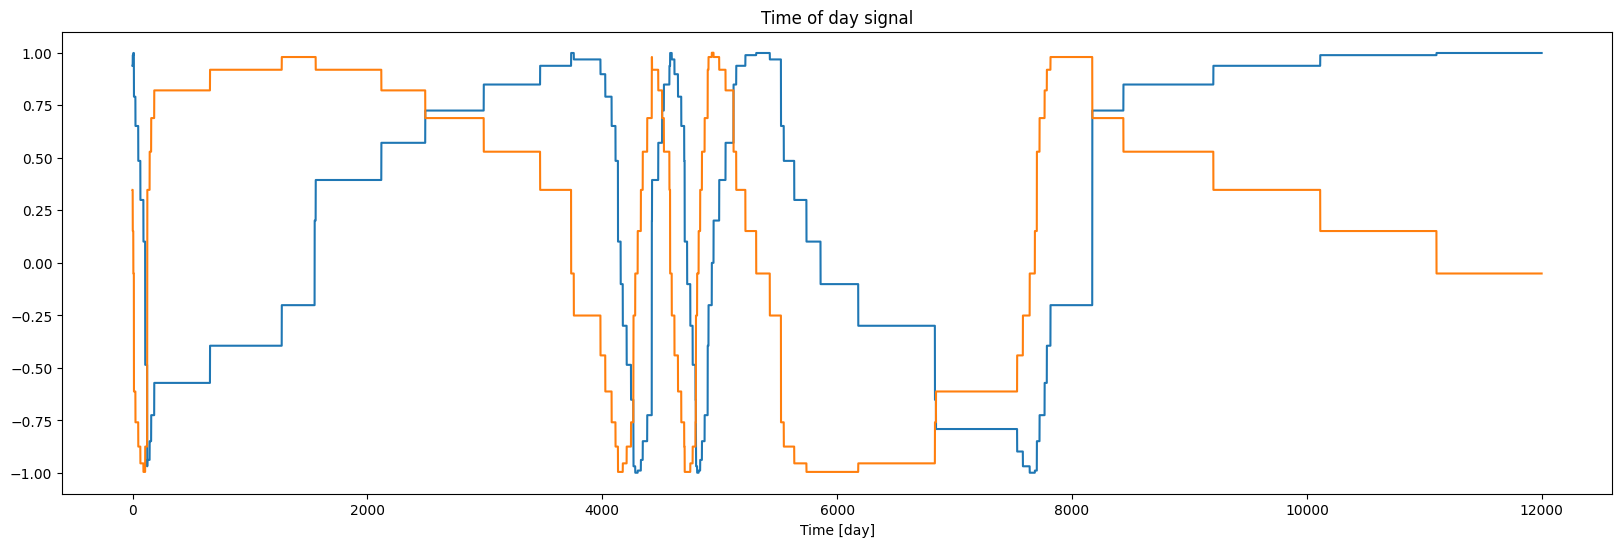

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(train['day_sin'][0:12000])#.unique())
plt.plot(train['day_cos'][0:12000]) #.unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

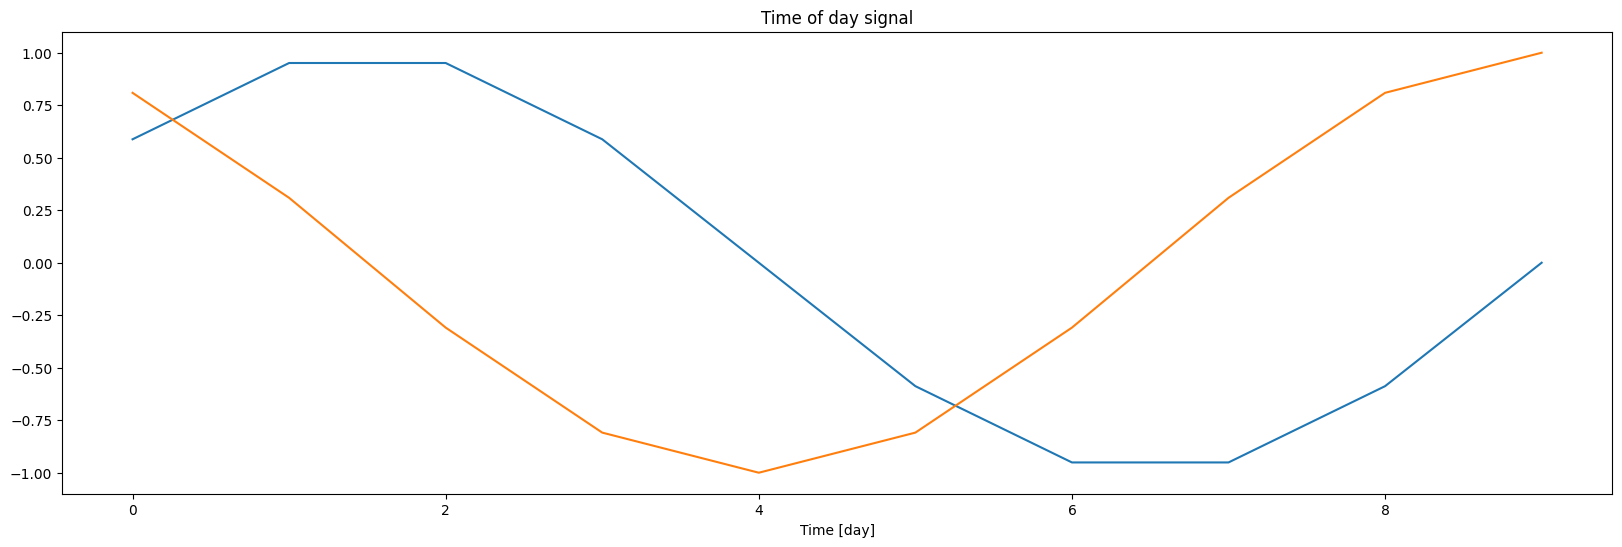

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(train['month_sin'].unique())
plt.plot(train['month_cos'].unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

In [19]:
!pip install category_encoders

In [20]:
import category_encoders as ce
import warnings

warnings.filterwarnings("ignore")


for feature in ["job", "marital"]:
    count_enc = ce.CountEncoder(cols=[feature])
    count_enc.fit(train)
    train[f"{feature}_count_enc"] = count_enc.transform(train)[feature].copy()
    test[f"{feature}_count_enc"] = count_enc.transform(test)[feature].copy()

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 54)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day,month,day_sin,day_cos,month_sin,month_cos,job_count_enc,marital_count_enc
0,38,blue-collar,married,1,0,863,0,0,6,1,78,1,0,0,0,2022,2022-01-06,False,dni_42591,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,6,1,0.937752,0.347305,0.587785,0.809017,10323,27098
1,29,services,single,1,0,814,0,0,6,1,54,1,0,0,0,2022,2022-01-06,False,dni_42592,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,6,1,0.937752,0.347305,0.587785,0.809017,4225,12879
2,40,admin.,divorced,1,0,212,0,0,7,1,176,1,0,0,0,2022,2022-01-07,True,dni_42596,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,5158,5162
3,51,technician,divorced,2,0,363,1,0,7,1,7,1,0,0,0,2022,2022-01-07,False,dni_42593,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,7638,5162
4,33,admin.,divorced,1,0,212,1,0,7,1,23,1,0,0,0,2022,2022-01-07,False,dni_42594,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,7,1,0.988468,0.151428,0.587785,0.809017,5158,5162



[INFO] Testing dataset dimnesions (rows, cols): (4593, 54)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,year,date,duplicated,id,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_11,month_12,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,day,month,day_sin,day_cos,month_sin,month_cos,job_count_enc,marital_count_enc
0,60,retired,divorced,0,0,8434,0,0,2,11,105,2,0,0,0,2022,2022-11-02,False,dni_42093,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,2301,5162
1,65,retired,married,0,0,1992,0,0,2,11,459,1,0,0,0,2022,2022-11-02,False,dni_42106,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,2301,27098
2,20,student,single,0,0,0,0,0,2,11,69,4,182,4,0,2022,2022-11-02,True,dni_42097,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,946,12879
3,33,management,single,2,0,2485,1,0,2,11,91,2,0,0,0,2022,2022-11-02,False,dni_42098,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,9159,12879
4,30,technician,single,1,0,846,0,0,2,11,75,2,0,0,0,2022,2022-11-02,False,dni_42099,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11,0.394356,0.918958,0.587785,0.809017,7638,12879


### 2.4 Selección de características para eliminar variables irrelevantes o redundantes

In [21]:
baseline_features = [
    'age', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
    'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
    'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
    'marital_single', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
    'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'

]

features = [
    'education', 'default', 'balance', 'housing', 'loan', 'duration', 'pdays', 'previous',
    'job_count_enc', 'marital_count_enc', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'cat_age'
]

target = 'cd'

### 2.5 Dividir los datos en conjuntos de entrenamiento y prueba

In [22]:
import os
import random

import numpy as np

SEED = 42


def set_seed_everything(seed: int = SEED):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed_everything()

In [23]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[baseline_features].shape}")
    display(train[baseline_features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[baseline_features].shape}")
    display(test[baseline_features].head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,38,1,0,863,0,0,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
1,29,1,0,814,0,0,54,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0
2,40,1,0,212,0,0,176,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
3,51,2,0,363,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0
4,33,1,0,212,1,0,23,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0



[INFO] Testing dataset dimnesions (rows, cols): (4593, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,60,0,0,8434,0,0,105,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,65,0,0,1992,0,0,459,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,20,0,0,0,0,0,69,4,182,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,33,2,0,2485,1,0,91,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,30,1,0,846,0,0,75,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [24]:
X_train, X_test = train[baseline_features].values, test[baseline_features].values,
y_train, y_test = train[target].values, test[target].values

In [25]:
print("\n[INFO] Counts of classes to predict:\n", pd.Series(y_test).value_counts())
print("\n[INFO] Percentage of classes to predict:\n", pd.Series(y_test).value_counts(normalize=True))


[INFO] Counts of classes to predict:
 0    4042
1     551
dtype: int64

[INFO] Percentage of classes to predict:
 0    0.880035
1    0.119965
dtype: float64


## 3. Selección del modelo

En este punto, debes elegir el modelo adecuado para la tarea de clasificación binaria. Puedes considerar modelos como regresión logística, árboles de decisión, redes neuronales o ensamblajes de modelos. Debes considerar el equilibrio entre la precisión del modelo y la interpretabilidad del mismo.


### 3.1 Elegir el modelo adecuado para la tarea de clasificación binaria

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV


sgd_clf = SGDClassifier(random_state=SEED, loss="hinge")
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score

print(
    "[INFO] Accuracy in training: ",
    np.mean(cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy"))
)
print(
    "[INFO] Accuracy in testing: ",
    np.mean(cross_val_score(sgd_clf, X_test, y_test, cv=5, scoring="accuracy"))
)

[INFO] Accuracy in training:  0.8161914321035318
[INFO] Accuracy in testing:  0.8438920774451721


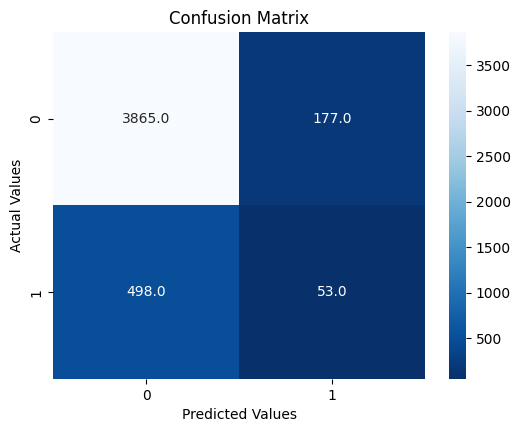

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

palette = sns.color_palette(["#e42256", "#00b1b0"])


def plot_confusion_matrix(cm: np.array, title: str = None):
    plt.figure(figsize=(6, 4.5))
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='.1f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
    cm_plot.set_title("Confusion Matrix" if title is None else f"{title}")
    plt.show()


y_pred = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

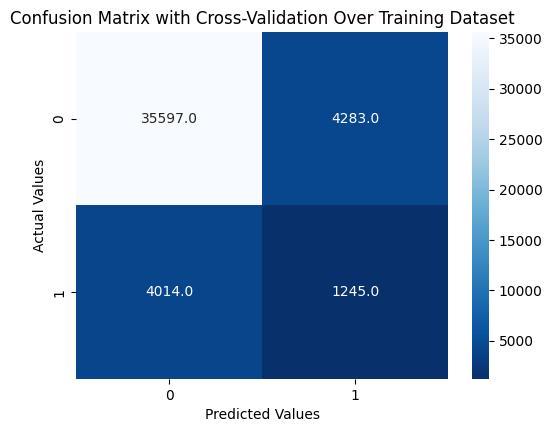

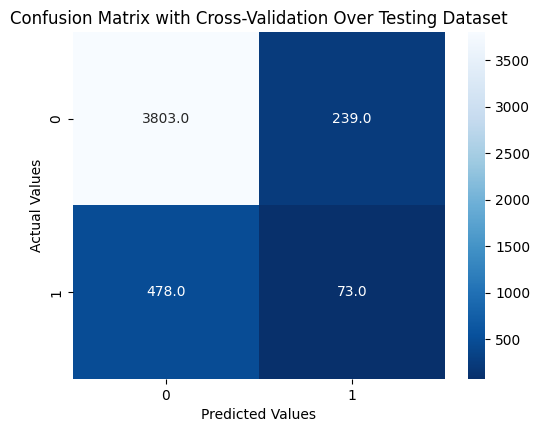

In [29]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Training Dataset")

y_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=5)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.89      0.94      0.91      4042
    Positive       0.23      0.13      0.17       551

    accuracy                           0.84      4593
   macro avg       0.56      0.54      0.54      4593
weighted avg       0.81      0.84      0.82      4593



### 3.2 Considerando otros modelos y efectuar validación cruzada para evaluar diferentes modelos y seleccionar el mejor

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import warnings

warnings.filterwarnings("ignore")


cs = np.logspace(-5, 5, 20)

logit_clf = LogisticRegressionCV(Cs=cs)
logit_clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]))

In [32]:
y_pred = logit_clf.predict(X_test)
y_pred_proba = logit_clf.predict_proba(X_test)

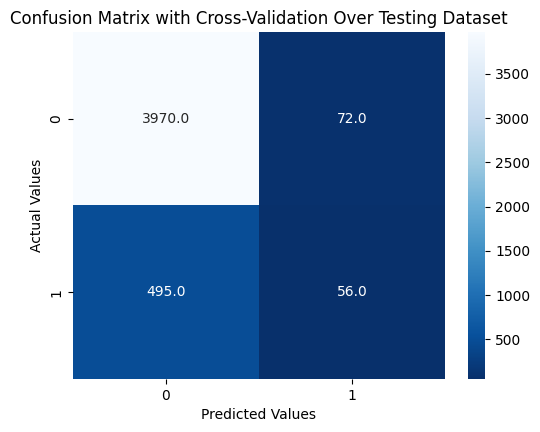

In [33]:
y_pred = cross_val_predict(logit_clf, X_test, y_test, cv=10)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

In [34]:
print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      4042
    Positive       0.44      0.10      0.16       551

    accuracy                           0.88      4593
   macro avg       0.66      0.54      0.55      4593
weighted avg       0.83      0.88      0.84      4593



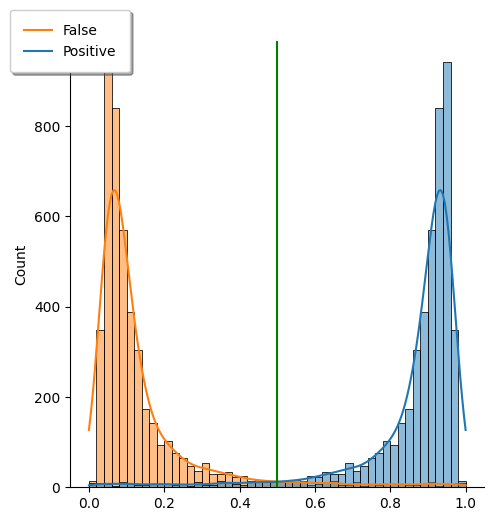

In [36]:
sns.displot(y_pred_proba, bins=50, kde=True, legend=False)
plt.axvline(0.5, color='g', label="Decision Boundary")
plt.legend(
    ["False", "Positive"],
    loc="center",
    bbox_to_anchor=(0, 1),
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1
)
plt.show()

In [37]:
predictions = pd.concat([
    test[baseline_features + ["date"]],
    pd.DataFrame(
        index=np.arange(0, len(test)),
        data=np.concatenate((y_pred_proba, np.array([y_test]).T, np.array([y_pred]).T), axis=1),
        columns=["negative", "positive", "ground_truth", "label"]
    )
], axis=1)

predictions.sort_values(by="date", inplace=True)

with pd.option_context("display.max_columns", None):
    display(predictions)

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,date,negative,positive,ground_truth,label
0,60,0,0,8434,0,0,105,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.920268,0.079732,0.0,0.0
30,51,1,0,580,1,0,117,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.966272,0.033728,0.0,0.0
29,26,2,0,906,0,0,109,1,160,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.907061,0.092939,0.0,0.0
28,38,2,0,732,0,0,53,2,161,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.925995,0.074005,0.0,0.0
27,35,1,0,580,1,0,180,2,171,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2022-11-02,0.920841,0.079159,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,46,2,0,461,0,0,369,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.836630,0.163370,1.0,0.0
4589,30,2,0,3185,1,0,158,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.940372,0.059628,0.0,0.0
4590,40,1,0,3126,1,0,110,3,232,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-30,0.919913,0.080087,0.0,0.0
4591,32,1,0,14533,0,0,646,3,198,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2022-12-31,0.484972,0.515028,0.0,0.0


In [38]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[features].shape}")
    display(train[features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[features].shape}")
    display(test[features].head())

[INFO] Training dataset dimnesions (rows, cols): (45139, 15)


,education,default,balance,housing,loan,duration,pdays,previous,job_count_enc,marital_count_enc,day_sin,day_cos,month_sin,month_cos,cat_age
0,1,0,863,0,0,78,0,0,10323,27098,0.937752,0.347305,0.587785,0.809017,3
1,1,0,814,0,0,54,0,0,4225,12879,0.937752,0.347305,0.587785,0.809017,2
2,1,0,212,0,0,176,0,0,5158,5162,0.988468,0.151428,0.587785,0.809017,3
3,2,0,363,1,0,7,0,0,7638,5162,0.988468,0.151428,0.587785,0.809017,4
4,1,0,212,1,0,23,0,0,5158,5162,0.988468,0.151428,0.587785,0.809017,2



[INFO] Testing dataset dimnesions (rows, cols): (4593, 15)


,education,default,balance,housing,loan,duration,pdays,previous,job_count_enc,marital_count_enc,day_sin,day_cos,month_sin,month_cos,cat_age
0,0,0,8434,0,0,105,0,0,2301,5162,0.394356,0.918958,0.587785,0.809017,5
1,0,0,1992,0,0,459,0,0,2301,27098,0.394356,0.918958,0.587785,0.809017,6
2,0,0,0,0,0,69,182,4,946,12879,0.394356,0.918958,0.587785,0.809017,1
3,2,0,2485,1,0,91,0,0,9159,12879,0.394356,0.918958,0.587785,0.809017,2
4,1,0,846,0,0,75,0,0,7638,12879,0.394356,0.918958,0.587785,0.809017,2


## 4. Entrenamiento de modelos

Una vez que hayas elegido el modelo adecuado, debes entrenarlo utilizando el conjunto de datos de entrenamiento que has creado. Es posible que tengas que ajustar los parámetros del modelo para obtener los mejores resultados posibles. También debes evaluar la calidad del modelo utilizando medidas como la precisión, la sensibilidad y la especificidad.


### 4.1 Ajuste de los hiperparámetros del modelo utilizando técnicas como GridSearchCV


In [39]:
X_train, X_test = train[features].values, test[features].values
y_train, y_test = train[target].values, test[target].values

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=-1,
    seed=SEED
)

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [41]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140}

In [42]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)

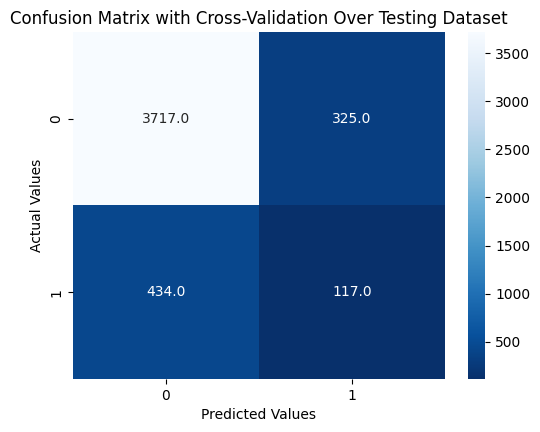

In [43]:
y_pred = cross_val_predict(grid_search.best_estimator_, X_test, y_test, cv=10)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

In [44]:
print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.90      0.92      0.91      4042
    Positive       0.26      0.21      0.24       551

    accuracy                           0.83      4593
   macro avg       0.58      0.57      0.57      4593
weighted avg       0.82      0.83      0.83      4593



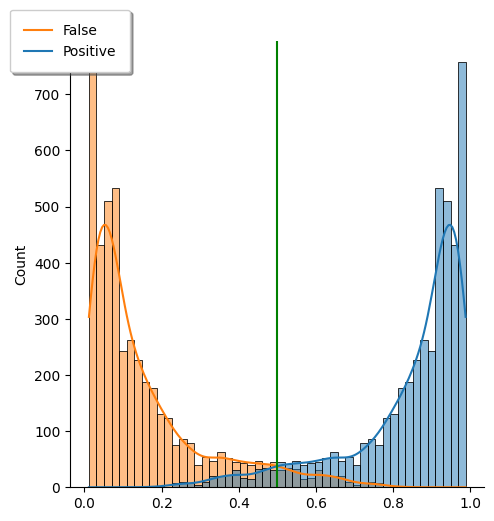

In [45]:
sns.displot(y_pred_proba, bins=50, kde=True, legend=False)
plt.axvline(0.5, color='g', label="Decision Boundary")
plt.legend(
    ["False", "Positive"],
    loc="center",
    bbox_to_anchor=(0, 1),
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1
)
plt.show()

### 4.2 Busquedas de hiperparámetros más robustas como la optimización Bayesiana

In [46]:
!pip install optuna

In [47]:
import optuna
from optuna.samplers import TPESampler

import sklearn.datasets
import xgboost as xgb


def objective(trial):
    train_x, train_y = X_train, y_train
    dtrain = xgb.DMatrix(train_x, label=train_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc


if __name__ == "__main__":
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    sampler = TPESampler(seed=SEED)
    study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-04-12 19:15:06,503] A new study created in memory with name: no-name-78bd6b8a-8405-4ee7-8c11-bdbf9509961d
[I 2023-04-12 19:15:08,160] Trial 0 finished with value: 0.8698942472731087 and parameters: {'booster': 'gblinear', 'lambda': 0.0006155564318973012, 'alpha': 1.77071686435378e-07}. Best is trial 0 with value: 0.8698942472731087.
[I 2023-04-12 19:15:26,143] Trial 1 finished with value: 0.897615562486282 and parameters: {'booster': 'dart', 'lambda': 0.0006440507553993703, 'alpha': 0.004619347374377372, 'max_depth': 1, 'eta': 0.574485163632042, 'gamma': 0.04566054873446119, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.1371407316372935e-06, 'skip_drop': 0.000784915956255507}. Best is trial 1 with value: 0.897615562486282.
[I 2023-04-12 19:15:44,026] Trial 2 finished with value: 0.7548670022247767 and parameters: {'booster': 'dart', 'lambda': 4.452048365748842e-05, 'alpha': 0.019116469627784252, 'max_depth': 2, 'eta': 0.00012997

Number of finished trials: 100
Best trial:
  Value: 0.9306578963001034
  Params: 
    booster: gbtree
    lambda: 1.4071286997245965e-08
    alpha: 0.28699722462061544
    max_depth: 9
    eta: 0.15887844684552552
    gamma: 9.082864110580756e-08
    grow_policy: depthwise


In [48]:
best_params = trial.params
best_params

{'booster': 'gbtree',
 'lambda': 1.4071286997245965e-08,
 'alpha': 0.28699722462061544,
 'max_depth': 9,
 'eta': 0.15887844684552552,
 'gamma': 9.082864110580756e-08,
 'grow_policy': 'depthwise'}

In [49]:
best_params = {
    'booster': 'gbtree',
    'lambda': 1.4071286997245965e-08,
    'alpha': 0.28699722462061544,
    'max_depth': 9,
    'eta': 0.15887844684552552,
    'gamma': 9.082864110580756e-08,
    'grow_policy': 'depthwise',
    'seed': SEED
}

## 5. Validación de modelos

Una vez que hayas entrenado el modelo, debes validarlo utilizando el conjunto de datos de prueba que has creado. Esto te permitirá determinar la precisión del modelo en datos nuevos y no vistos. Si el modelo no tiene una precisión adecuada, debes volver a entrenar el modelo o ajustar sus parámetros.

### 5.1 Validar el modelo utilizando el conjunto de datos de prueba

In [50]:
import xgboost as xgb


num_round = 100
dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train(best_params, dtrain, num_round)

In [51]:
dtest = xgb.DMatrix(X_test)
y_pred = np.array(bst.predict(dtest, ntree_limit=bst.best_iteration))
y_pred  = y_pred > 0.5  
y_pred = y_pred.astype(int)  
y_pred_proba = bst.predict(dtest)

### 5.2 Determinar la precisión del modelo en datos nuevos y no vistos

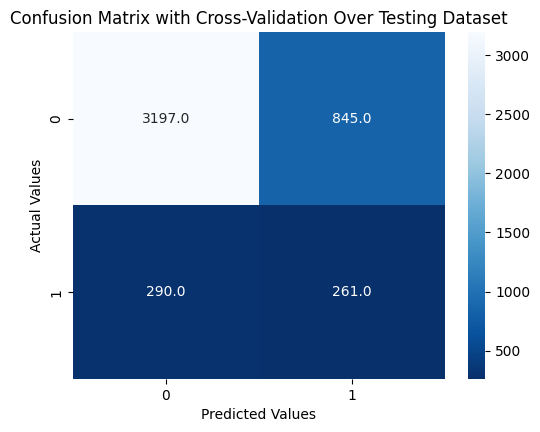

In [52]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

In [53]:
print(classification_report(y_test, y_pred, target_names=["False",  "Positive"]))

              precision    recall  f1-score   support

       False       0.92      0.79      0.85      4042
    Positive       0.24      0.47      0.32       551

    accuracy                           0.75      4593
   macro avg       0.58      0.63      0.58      4593
weighted avg       0.84      0.75      0.79      4593



In [54]:
print("[INFO] y_test unique and counts:", np.unique(y_test, return_counts=True))
print("[INFO] y_pred unique and counts:", np.unique(y_pred, return_counts=True))

[INFO] y_test unique and counts: (array([0, 1]), array([4042,  551]))
[INFO] y_pred unique and counts: (array([0, 1]), array([3487, 1106]))


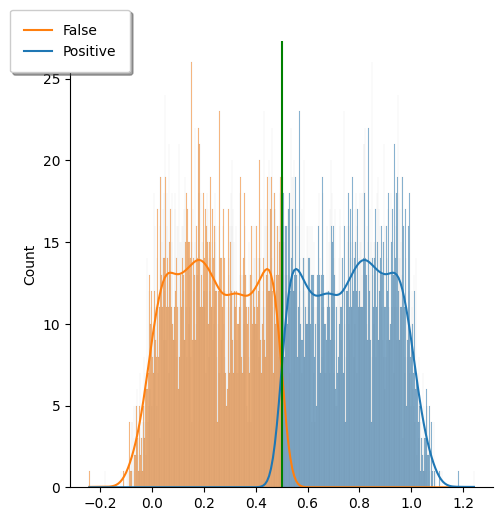

In [55]:
predictions = np.array([
    (prediction, 1-prediction) if prediction > 0.5 else (1-prediction, prediction)
    for prediction in y_pred_proba
])

sns.displot(predictions, bins=1000, kde=True, legend=False)
plt.axvline(0.5, color='g', label="Decision Boundary")
plt.legend(
    ["False", "Positive"],
    loc="center",
    bbox_to_anchor=(0, 1),
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1
)
plt.show()

## 6. Mejorar la toma de decisiones modificando las predicciones

Esta sección se refiere a la posibilidad de ajustar el umbral de probabilidad de los modelos predictivos con el fin de optimizar su desempeño en función de los objetivos de negocio específicos de la entidad financiera. Esta sección sugiere una serie de buenas prácticas para ajustar el umbral de probabilidad, como la utilización de curvas de ganancia, el análisis de costo-beneficio y la evaluación de la precisión y la recuperación del modelo en diferentes umbrales de probabilidad. El objetivo de esta sección es ayudar a los científicos de datos a ajustar el umbral de probabilidad de los modelos para maximizar su utilidad en el contexto empresarial, permitiendo una mejor focalización de recursos en los clientes con mayor probabilidad de adquirir un depósito a plazo fijo.

### 6.1 Comprender la lógica de negocio de la entidad financiera y su objetivo de campaña

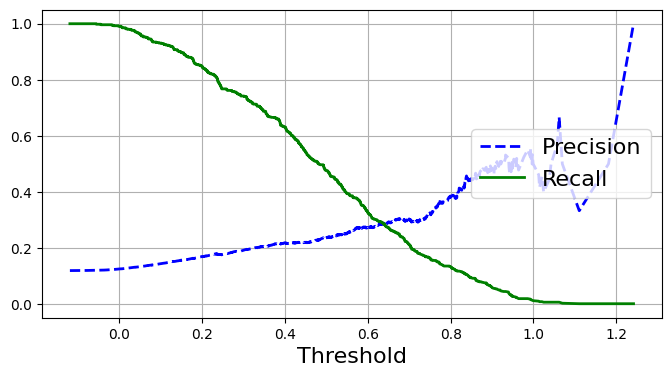

In [56]:
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)                      # Not shown
plt.show()

### 6.2 Modificar el umbral de la frontera de decisión para ajustarlo a los objetivos de la entidad financiera

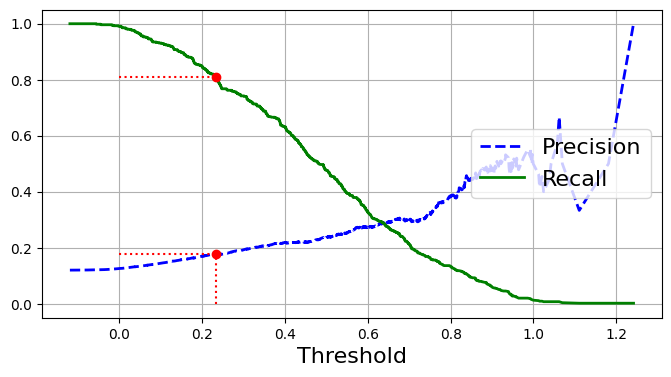

In [57]:
business_precision = 0.17923

recall_90_precision = recalls[np.argmax(precisions >= business_precision)]
threshold_90_precision = thresholds[np.argmax(precisions >= business_precision)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., business_precision], "r:")                 # Not shown
plt.plot([0, threshold_90_precision], [business_precision, business_precision], "r:")                                # Not shown
plt.plot([0, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [business_precision], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

### 6.3 Evaluar el impacto de la modificación del umbral de la frontera de decisión en la precisión del modelo


In [58]:
dtest = xgb.DMatrix(X_test)
y_pred = np.array(bst.predict(dtest, ntree_limit=bst.best_iteration))
y_pred  = y_pred > threshold_90_precision  
y_pred = y_pred.astype(int)  
y_pred_proba = bst.predict(dtest)

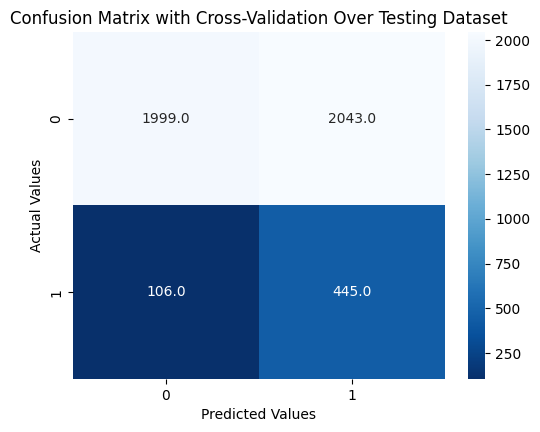

In [59]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

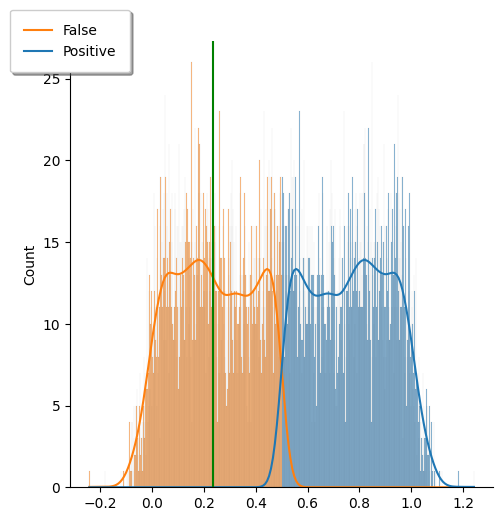

In [60]:
predictions = np.array([
    (prediction, 1-prediction) if prediction > 0.5 else (1-prediction, prediction)
    for prediction in y_pred_proba
])

sns.displot(predictions, bins=1000, kde=True, legend=False)
plt.axvline(threshold_90_precision, color='g', label="Decision Boundary")
plt.legend(
    ["False", "Positive"],
    loc="center",
    bbox_to_anchor=(0, 1),
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1
)
plt.show()

### 6.4 Realizar ajustes adicionales y repita los pasos necesarios


In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interp
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    average_precision_score,
    precision_recall_curve
)
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
import itertools
import warnings

warnings.filterwarnings("ignore")


def _threshold_finder(X, y_true, y_predict_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba)
    auc = roc_auc_score(y_true, y_predict_proba)
    precision, recall, thresholds2 = precision_recall_curve(y_true, y_predict_proba)
    
    class_names = [0, 1]
    youden_idx = np.argmax(np.abs(tpr - fpr))
    youden_threshold = thresholds[youden_idx]
    y_pred_youden = (y_predict_proba > youden_threshold).astype(int)
    cnf_matrix = confusion_matrix(y_true, y_pred_youden)
    np.set_printoptions(precision=2)
    
    f1 = []
    for i in range(len(precision)):
        f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
        
    queue_rate = []
    for thr in thresholds2:
        queue_rate.append((y_predict_proba >= thr).mean()) 

    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color = "red", label = F"AUC = {auc:.3f}")
    plt.plot(fpr[youden_idx], tpr[youden_idx], marker = "o", color = "navy", ms =10, label =F"Youden Threshold = {youden_threshold:.2f}" )
    plt.axvline(x = fpr[youden_idx], ymin = fpr[youden_idx], ymax = tpr[youden_idx], color = "navy", ls = "--")
    plt.plot([0,1], [0,1] , color = "black", ls = "--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('1 - Specificity' , fontsize=12)
    plt.ylabel('Sensitivity' , fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend( prop={'size':12} , loc = 4)

    plt.subplot(1,2,2)
    _plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, cmap=plt.cm.Reds, title = F"Youden Threshold = {youden_threshold:.2f}\nAccuracy = {accuracy_score(y_true, y_pred_youden)*100:.2f}%")
    plt.show()


def _plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True Class', fontsize = 14)
    plt.xlabel('Predicted Class', fontsize = 14)

    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()

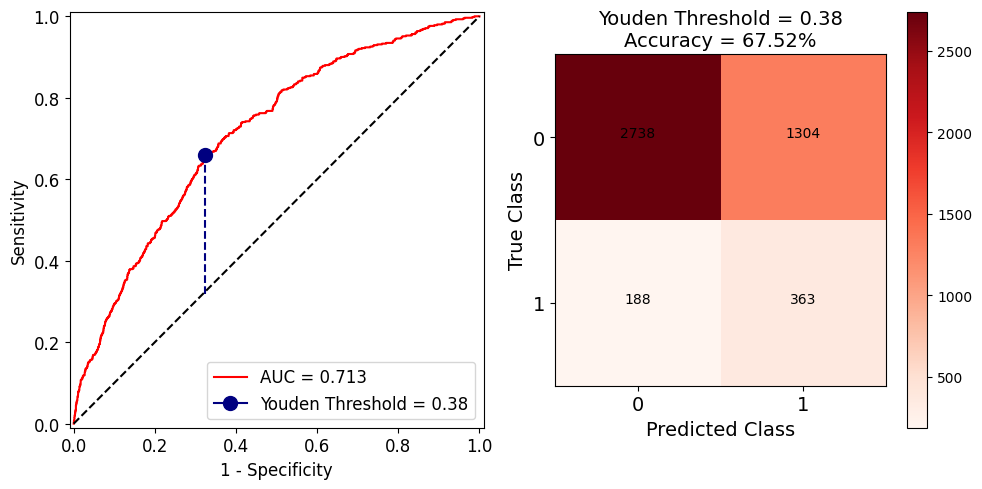

In [62]:
_threshold_finder(X_test, y_test, y_pred_proba)

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>